# Age masks for daily climatology

Creating a water mass mask, for the daily cliamtology, based on the monthly age output interpolated daily.

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col
import pandas as pd
import scipy.stats as stats
from tqdm import tqdm
import logging
import matplotlib.cm as cm
from xhistogram.xarray import histogram


logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/x77/wf4500/ASC_project/analysis_figs/'

In [2]:
client = Client()

In [19]:

test_z=xr.open_mfdataset("/scratch/oz91/wf4500/panan0025_rerun_17DEC2024/wf4500/mom6/archive/mom6-panan/output132/*01.ocean_month_z.nc").isel(time=0).volcello.load()
test_rho=xr.open_mfdataset("/scratch/oz91/wf4500/panan0025_rerun_17DEC2024/wf4500/mom6/archive/mom6-panan/output132/*01.ocean_month_rho2.nc").isel(time=0).volcello.load()


In [20]:
test_daily=xr.open_mfdataset("/scratch/oz91/wf4500/panan0025_rerun_17DEC2024/wf4500/mom6/archive/mom6-panan/output132/*.ocean_daily_200*.nc")
zos = test_daily.zos.mean('time',skipna = False).compute()

test_z_daily = xr.open_mfdataset("/scratch/oz91/wf4500/panan0025_rerun_17DEC2024/wf4500/mom6/archive/mom6-panan/output132/*ocean_daily_z*.nc")
uo = test_z_daily.uo.mean('time',skipna = False).mean('z_l_sub01',skipna = False).compute()
vo = test_z_daily.vo.mean('time',skipna = False).mean('z_l_sub01',skipna = False).compute()


In [21]:
test_daily.time

<xarray.DataArray 'time' (time: 31)> Size: 248B
array([cftime.DatetimeNoLeap(2002, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 4, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 5, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 6, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 7, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 8, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 9, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 10, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 11, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 12, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 13, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 14, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 17, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 18, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 19, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 20, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 21, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 22, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 23, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 24, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 25, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 26, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 27, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 28, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 31, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 248B 2002-01-01 12:00:00 ... 2002-01-31 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP
    bounds:         time_bnds

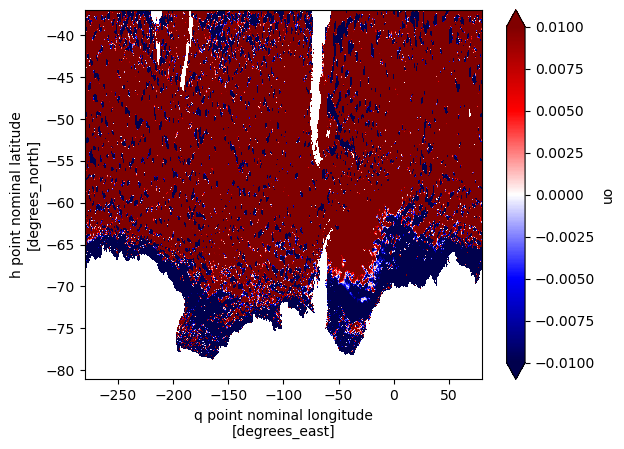

In [22]:
uo.plot(vmin=-.01,vmax=.01,cmap='seismic')

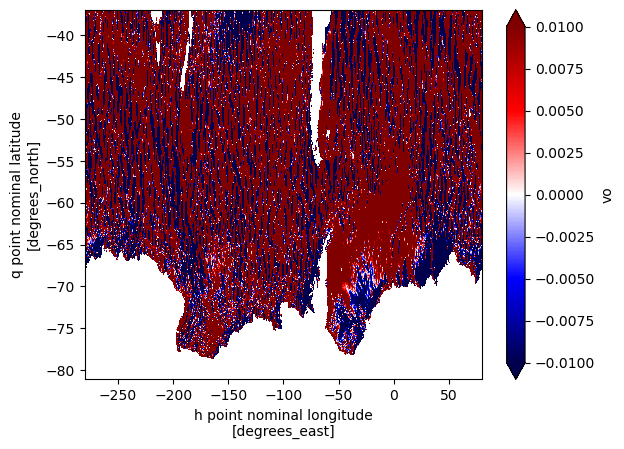

In [23]:
vo.plot(vmin=-.01,vmax=.01,cmap='seismic')

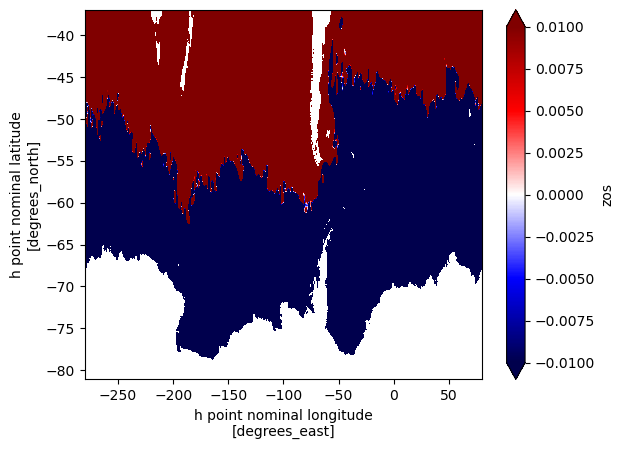

In [24]:
zos.plot(vmin=-.01,vmax=.01,cmap='seismic')

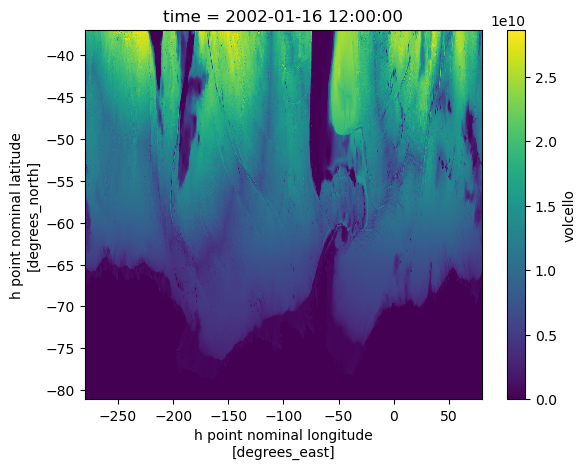

In [25]:
test_z.sum('z_l').plot()

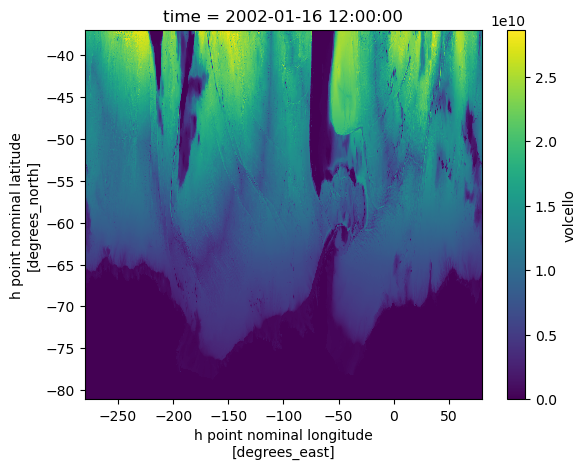

In [26]:
test_rho.sum('rho2_l').plot()